# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [113]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

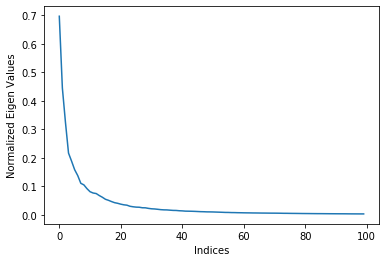

Approximate rank: 13


In [114]:
X = train_data[train_labels == 6.]
C = np.cov(X.T)
V, D = np.linalg.eigh(C)
V = V.real
ordered_V = V[::-1] / np.linalg.norm(V)
plt.plot(ordered_V[:100])
plt.xlabel('Indices')
plt.ylabel('Normalized Eigen Values')
plt.show()
threshold = 0.1 * np.amax(V)
V[V < threshold] = 0
print('Approximate rank: {}'.format(np.linalg.matrix_rank(np.diag(V))))

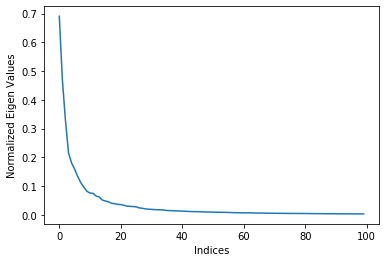

Approximate rank: 12


In [115]:
X = train_data[train_labels == 7.]
C = np.cov(X.T)
V, D = np.linalg.eigh(C)
V = V.real
ordered_V = V[::-1] / np.linalg.norm(V)
plt.plot(ordered_V[:100])
plt.xlabel('Indices')
plt.ylabel('Normalized Eigen Values')
plt.show()
threshold = 0.1 * np.amax(V)
V[V < threshold] = 0
print('Approximate rank: {}'.format(np.linalg.matrix_rank(np.diag(V))))

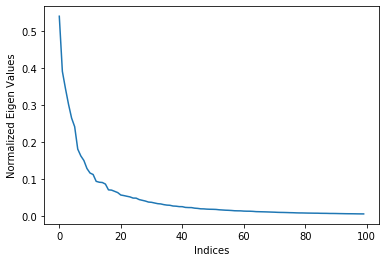

Approximate rank: 22


In [116]:
X = train_data
C = np.cov(X.T)
V, D = np.linalg.eigh(C)
V = V.real
ordered_V = V[::-1] / np.linalg.norm(V)
plt.plot(ordered_V[:100])
plt.xlabel('Indices')
plt.ylabel('Normalized Eigen Values')
plt.show()
threshold = 0.1 * np.amax(V)
V[V < threshold] = 0
print('Approximate rank: {}'.format(np.linalg.matrix_rank(np.diag(V))))

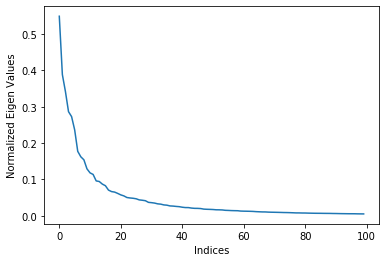

Approximate rank: 21


In [117]:
indices = np.random.randint(0, 6000, 3000)
X = train_data[indices]
C = np.cov(X.T)
V, D = np.linalg.eigh(C)
V = V.real
ordered_V = V[::-1] / np.linalg.norm(V)
plt.plot(ordered_V[:100])
plt.xlabel('Indices')
plt.ylabel('Normalized Eigen Values')
plt.show()
threshold = 0.1 * np.amax(V)
V[V < threshold] = 0
print('Approximate rank: {}'.format(np.linalg.matrix_rank(np.diag(V))))

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
### 1.3.1 Solution 1
- NOTE: Components = Principal Components (from PCA)
- Plots (a) and (b) are quite similar as the eigen values corresponding to their covariance matrices are similar, and the components contributing to the data in their corresponding classes are similar.
- Plots (b) and (c) are different as plot (b) is for only 1 digit and hence has fewer eigen values of higher values, as the principal components with the most amount of data for the same digit are fewer in number, however, considering all data in plot (c), gives us a larger number of eigen values above a threshold as the number of components contributing significantly to all digits combined is greater than that of just 1. This explains which (b) is a steeper curve than (c).
- Approximating the rank as the number of eigen vectors greater than 10% of the magnitude of the maximum eigen value, the approximate ranks are as follows:
    - (a) Rank = 13
    - (b) Rank = 12
    - (c) Rank = 22
    - (d) Rank = 21
---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
### 1.3.1 Solution 2
- The elements in each data point (in R<sup>784</sup>) are in {0, 1}, therefore we have 2 choices (0 or 1) and 784 different elements per data point. Hence, a total of **2<sup>784</sup>** images are possile.
- Consider MNIST data
    - Considering **70,000** images (As per online source, total MNIST dataset has 70,000 images)
        - We have (70000 / 2<sup>784</sup>) * 100 = **6.879889127682485e-230 %**
    - Considering **7000** images from our subset
        - We have (7000 / 2<sup>784</sup>) * 100 = **6.879889127682485e-231 %**
- If we considered all possible data points, our eigen value spectrum would be linear and perpendicular to the axis corresponding to magnitude, as we will have non-zero eigen values along every dimension and the variance along all components would be the same. All of their magnitudes will be the same. 
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
- Consider a data set **X<sub>n x d</sub>** whose mean is 0 (for the sake of convinience of representation in the following equations) 
- Consider an orthonormal matrix **A**
- Our transformed data would be **Y = XA**
- Covariance matrix for X would be 
    - **C<sub>X</sub> = (X - 0) (X - 0)<sup>T</sup>** 
    - **C<sub>X</sub> = X X<sup>T</sup>** 
- Covariance matrix of Y would be 
    - **C<sub>Y</sub> = (Y - 0) (Y - 0)<sup>T</sup>**
    - **C<sub>Y</sub> = Y Y<sup>T</sup>**
    - **C<sub>Y</sub> = (X A - 0) (X A - 0)<sup>T</sup>** 
    - (As lengths are preserved mean stays 0, if mean is not 0, they would be appropriately transformed/rotated along with the data vectors)
    - **C<sub>Y</sub> = X A A<sup>T</sup> X**
    - **C<sub>Y</sub> = X I X<sup>T</sup>**
    - **C<sub>Y</sub> = X X<sup>T</sup>**
    - **C<sub>Y</sub> = C<sub>X</sub>**
- Therefore, the eigen value spectrum will be preserved after the orthonormal tranformation.
---

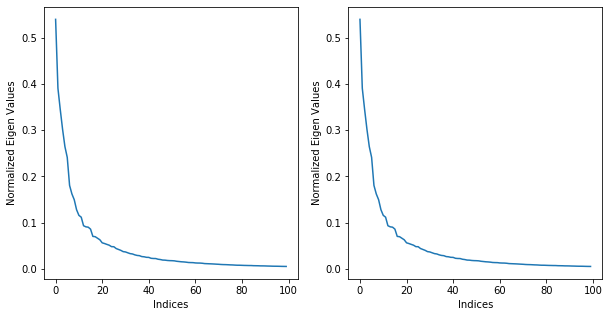

Absolute error: 8.253773408708237e-16


In [118]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.

generator_matrix = np.random.rand(784, 784)
orthonormal, triangular_matrix = np.linalg.qr(generator_matrix)
orthonormal = orthonormal.T

X = train_data
Y = np.dot(train_data, orthonormal)

C_x = np.cov(X.T)
C_y = np.cov(Y.T)

V_x, D_x = np.linalg.eigh(C_x)
V_y, D_y = np.linalg.eigh(C_y)

V_x = V_x.real
ordered_V_x = V_x[::-1] / np.linalg.norm(V_x)
V_y = V_y.real
ordered_V_y = V_y[::-1] / np.linalg.norm(V_y)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(ordered_V_x[:100])
plt.xlabel('Indices')
plt.ylabel('Normalized Eigen Values')

plt.subplot(1, 2, 2)
plt.plot(ordered_V_y[:100])
plt.xlabel('Indices')
plt.ylabel('Normalized Eigen Values')

plt.show()
print('Absolute error: {}'.format(np.linalg.norm(abs(ordered_V_x - ordered_V_y))))

### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

---
- Consider a data set X, of mean = 0 for the sake of convenience of representation in the followig equations
- Our data set is multiplied by a rank deficient matrix M whose rank is represented as *rank(M)*
- **Y = X M**, for which ***rank(Y) $\leq$ min( rank(X), rank(M) )***
- Using Singular Value Decomposition, **Y = U S V<sup>T</sup>**, where
    - **U**, **V** are Orthogonal Matrices
    - **S** has at most *rank(M)* non-zero singular values (= *rank(S)*)
- Covariance matrix, 
    - **C = Y Y<sup>T</sup>**
    - **C = (U S V<sup>T</sup>) (U S V<sup>T</sup>)<sup>T</sup>**
    - **C = U S V<sup>T</sup> V S<sup>T</sup> U<sup>T</sup>**
    - **C = U S I S<sup>T</sup> U<sup>T</sup>**
    - **C = U S S<sup>T</sup> U<sup>T</sup>**
    - **C = U R U<sup>-1</sup>**
- **C = U R U<sup>-1</sup>** is the eigen decomposition of **C**
- **R = S S<sup>T</sup>** is a diagonal matrix with maximum of *rank(M)* number of non-zero diagonal values
- Therefore, ***rank(C)* $\leq$ *rank(M)***, due to which the eigen spectrum will have a maximum of *rank(M)* non-zero eigen values
- Therefore, considering multiplying a matrix of rank 1 will give us an eigen spectrum with a maximum of 1 non-zero eigen value
- Similarly, when rank is 2, eigen spectrum will have at most 2 non-zero eigen values
---

### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

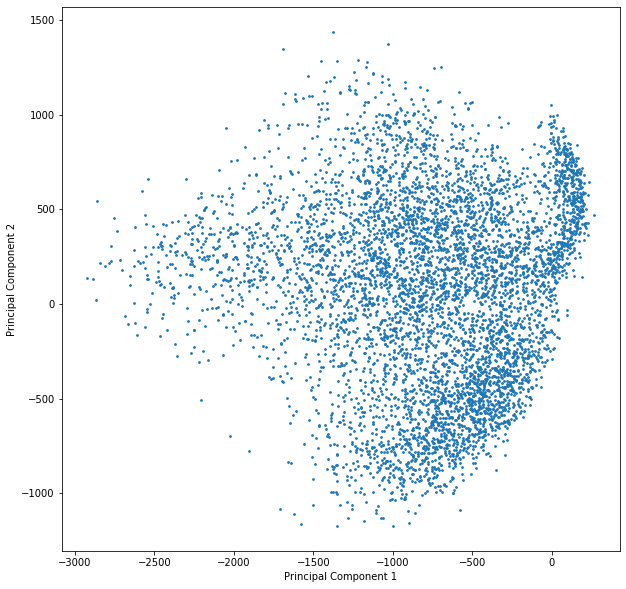

In [128]:
X = train_data
C = np.cov(X.T)
V, D = np.linalg.eigh(C)
desc_components = D[:, ::-1]
components = desc_components[:, :2]
projection = np.dot(train_data, components)
plt.figure(figsize=(10, 10))
plt.scatter(projection[:, 0], projection[:, 1], s=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [120]:
# Print accuracy on the test set using MLE
import math
means = np.zeros((10, train_data.shape[1]))
inv_cov = []
determinants = []
dims = []
accurate = 0

for i in range(10):
    data = train_data[train_labels == i]
    means[i] = np.mean(data, axis=0)
    covariance = (1 / data.shape[0]) * ((data - means[i]).T @ (data - means[i]))
    # u, s, vh = np.linalg.svd(covariance)
    # indices = s[~np.all(s == 0, axis=1)]
    # s = s[indices]
    # u = u[:, indices]
    # smat = np.diag(s)
    # inv_cov.append(np.allclose(covariance, np.dot(u, np.dot(smat, vh))))
    # determinant = np.prod(s, axis=0)
    inv_cov.append(np.linalg.pinv(covariance))
    V, D = np.linalg.eig(covariance)
    V = V.real
    determinant = 0
    dim = 0
    for v in V:
        if v > 0:
            determinant = determinant + np.log(v)
            dim = dim + 1
    dims.append(dim)        
    determinants.append(determinant)

for i in range(test_labels.shape[0]):
    likelihoods = []
    for j in range(10):
        likelihood = -0.5 * ((dims[j] * np.log(2 * math.pi) + determinants[j]) + ((test_data[i] - means[j]).T @ inv_cov[j] @ (test_data[i] - means[j])))
        likelihoods.append(likelihood)
    prediction = np.argmax(likelihoods)
    if prediction == test_labels[i]:
        accurate = accurate + 1
    
print('MLE Accuracy = {}%'.format((accurate / test_labels.shape[0]) * 100))

MLE Accuracy = 74.2%


#### Explanation for prior:
We choose the apriori probability computed as probability of the sample in the entire dataset. Since, there are 600 data points of each digit in the dataset of 6000, each digit has a probability of **0.1**.

In [121]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)
# prior = 0.1 as it is uniform probability distribution

import math
means = np.zeros((10, train_data.shape[1]))
inv_cov = []
determinants = []
dims = []
accurate = 0
apriori = 0.1

for i in range(10):
    data = train_data[train_labels == i]
    means[i] = np.mean(data, axis=0)
    covariance = (1 / data.shape[0]) * ((data - means[i]).T @ (data - means[i]))
    # u, s, vh = np.linalg.svd(covariance)
    # indices = s[~np.all(s == 0, axis=1)]
    # s = s[indices]
    # u = u[:, indices]
    # smat = np.diag(s)
    # inv_cov.append(np.allclose(covariance, np.dot(u, np.dot(smat, vh))))
    # determinant = np.prod(s, axis=0)
    inv_cov.append(np.linalg.pinv(covariance))
    V, D = np.linalg.eig(covariance)
    V = V.real
    determinant = 0
    dim = 0
    for v in V:
        if v > 0:
            determinant = determinant + np.log(v)
            dim = dim + 1
    dims.append(dim)        
    determinants.append(determinant)

for i in range(test_labels.shape[0]):
    likelihoods = []
    for j in range(10):
        likelihood = -0.5 * ((dims[j] * np.log(2 * math.pi) + determinants[j]) + ((test_data[i] - means[j]).T @ inv_cov[j] @ (test_data[i] - means[j]))) - np.log(apriori)
        likelihoods.append(likelihood)
    prediction = np.argmax(likelihoods)
    if prediction == test_labels[i]:
        accurate = accurate + 1
    
print('MAP Accuracy = {}%'.format((accurate / test_labels.shape[0]) * 100))

MAP Accuracy = 74.2%


In [122]:
# Print accuracy using Bayesian pairwise majority voting method

import math
means = np.zeros((10, train_data.shape[1]))
covariances = []
combinations = []
inv_cov = dict()
determinants = dict()
dims = dict()
accurate = 0

for i in range(10):
    data = train_data[train_labels == i]
    means[i] = np.mean(data, axis=0)
    covariance = (1 / data.shape[0]) * ((data - means[i]).T @ (data - means[i]))
    covariances.append(covariance)

for i in range(9):
    for j in range(i + 1, 10):
        combinations.append((i, j))
        covariance = 0.5 * (covariances[i] + covariances[j])
        inv_cov[(i, j)] = np.linalg.pinv(covariance)
        V, D = np.linalg.eig(covariance)
        V = V.real
        determinant = 0
        dim = 0
        for v in V:
            if v > 0:
                determinant = determinant + np.log(v)
                dim = dim + 1
        dims[(i, j)] = dim        
        determinants[(i, j)] = determinant

for i in range(test_labels.shape[0]):
    likelihoods = []
    for combination in combinations:
        k = combination[0]
        j = combination[1]
        class_k = -0.5 * ((dims[(k, j)] * np.log(2 * math.pi) + determinants[(k, j)]) + ((test_data[i] - means[k]).T @ inv_cov[(k, j)] @ (test_data[i] - means[k])))
        class_j = -0.5 * ((dims[(k, j)] * np.log(2 * math.pi) + determinants[(k, j)]) + ((test_data[i] - means[j]).T @ inv_cov[(k, j)] @ (test_data[i] - means[j])))
        likelihoods.append(j if class_k < class_j else k)
    prediction = np.argmax(np.histogram(likelihoods, bins=np.arange(11))[0])
    if prediction == test_labels[i]:
        accurate = accurate + 1
    
print('Bayesian Pairwise Majority Voting Method Accuracy = {}%'.format((accurate / test_labels.shape[0]) * 100))

Bayesian Pairwise Majority Voting Method Accuracy = 83.8%


In [123]:
# Print accuracy using Simple Perpendicular Bisector majority voting method

means = np.zeros((10, train_data.shape[1]))
combinations = []
accurate = 0

for i in range(10):
    data = train_data[train_labels == i]
    means[i] = np.mean(data, axis=0)

for i in range(9):
    for j in range(i + 1, 10):
        combinations.append((i, j))

for i in range(test_labels.shape[0]):
    likelihoods = []
    for combination in combinations:
        k = combination[0]
        j = combination[1]
        d_k = np.linalg.norm(test_data[i] - means[k])
        d_j = np.linalg.norm(test_data[i] - means[j])
        likelihoods.append(j if d_k > d_j else k)
    prediction = np.argmax(np.histogram(likelihoods, bins=np.arange(11))[0])
    if prediction == test_labels[i]:
        accurate = accurate + 1
    
print('Simple Perpendicular Bisector Majority Voting Method Accuracy = {}%'.format((accurate / test_labels.shape[0]) * 100))      

Simple Perpendicular Bisector Majority Voting Method Accuracy = 77.0%


### 1.3.3 Question 4
Compare performances and salient observations

---
- Between MLE and MAP, since the probability distribution of the digits is uniform, the apriori is a constant, thereby they give the same result. These methods give us the poorest results as they compute the mean and covariance from the training data and use these very parameters for the prediction. This could possibly be leading to overfitting as the covariance and the mean is highly specific to the given dataset.
- Simple Perpendicular Bisector performs better than MLE and MAP as it places the decision boundary between the 2 classes irrespective of the distributions of the 2 classes, therefore, if the distribution for one class is steep and other is nearly flat, this method is not affected by the intersection between the distributions.
- However, Simple Perpendicular Bisector only considers mean as a parameter to help classify the test data set, which is not a sufficient enough a parameter for classification. This is a drawback for this method as compared to others where covariance is also factored in.
- In the case of Bayesian pairwise, along with the mean we also consider the mean of the covariances between 2 classes thereby preventing the overfitting to the data for one single digit and thus generalizing its classification, and thereby performing with a higher accuracy on the test set.
---

## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [124]:
# Your code here
# Print accuracies with K = 1, 3, 7
def K_Nearest_Neighbour(k, train_data, test_data, train_labels, test_labels):
    distance = np.zeros(train_data.shape[0], dtype=int)
    classification = np.zeros(test_data.shape[0], dtype=int)
    for i in range(test_labels.shape[0]):
        for j in range(train_labels.shape[0]):
            distance[j] = np.linalg.norm(abs(test_data[i] - train_data[j]))
        sorted_indices = np.argsort(distance)
        k_nearest = train_labels[sorted_indices[:k]]
        classification[i] = np.argmax(np.histogram(k_nearest, bins=np.arange(11))[0])
    fails = np.count_nonzero(classification.astype(int) - test_labels.astype(int))
    accuracy = ((test_labels.shape[0] - fails) / test_labels.shape[0]) * 100
    print('Accuracy (k = {0}): {1}%'.format(k, accuracy))
    
K_Nearest_Neighbour(1, train_data, test_data, train_labels, test_labels)
K_Nearest_Neighbour(3, train_data, test_data, train_labels, test_labels)
K_Nearest_Neighbour(7, train_data, test_data, train_labels, test_labels)            

Accuracy (k = 1): 90.8%
Accuracy (k = 3): 91.60000000000001%
Accuracy (k = 7): 91.60000000000001%


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
- Accuracies are not same, as when we increase k, we have a larger set of values to compare with, thereby preventing outliers from resulting in wrong classification.
- We can start at 1 and increase k in steps of 2 going over the odd numbers, and stopping as soon as we get the same accuracy in subsequent trials, choosing the k from the penultimate iteration. When we find the optimal k, our accuracy converges to the optimum accuracy we can obtain without having to factor in all N points. This would result in minimum iterations and optimal use of data for the classification.
---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [125]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [126]:
def Outlier_Detection(k, train_data):
    distance = np.zeros(train_data.shape[0], dtype=int)
    seen = np.zeros(train_data.shape[0], dtype=int)
    for i in range(train_data.shape[0]):
        for j in range(train_data.shape[0]):
            if i == j:
                distance[j] = np.max(distance)
            else:
                distance[j] = np.linalg.norm(abs(train_data[i] - train_data[j]))
        sorted_indices = np.argsort(distance)
        seen[sorted_indices[:k]] = 1
    print('Outlier Indices: ')
    print(np.where(seen.astype(int) == 0)[0])
    return np.where(seen.astype(int) == 0)[0]

merged_data = np.concatenate((train_data, mixed_data))
outliers = Outlier_Detection(7, merged_data)

Outlier Indices: 
[  53  127  160  318  340  391  400  424  485  489  517  539  622  626
  670  704  759  769  854  916  944  954  966  974  981  995 1001 1030
 1047 1091 1097 1104 1129 1142 1164 1235 1239 1244 1294 1301 1302 1316
 1332 1402 1405 1420 1432 1448 1480 1484 1501 1509 1534 1558 1642 1682
 1718 1758 1812 1818 1865 1872 1875 1924 1938 1940 2028 2029 2034 2108
 2134 2135 2148 2239 2246 2250 2268 2274 2324 2389 2533 2622 2648 2661
 2707 2728 2761 2781 2803 2823 2831 2835 2856 2872 2892 2901 3033 3068
 3096 3106 3136 3205 3251 3260 3268 3311 3362 3370 3467 3494 3510 3524
 3534 3580 3582 3590 3628 3682 3817 3872 3875 3906 3935 3941 3943 3980
 3988 4058 4066 4100 4122 4127 4148 4164 4167 4216 4258 4265 4270 4279
 4355 4447 4468 4482 4502 4618 4634 4652 4657 4762 4792 4802 4827 4840
 4842 4850 4878 5000 5029 5030 5032 5033 5063 5146 5182 5192 5276 5312
 5315 5356 5373 5404 5418 5464 5524 5530 5547 5552 5673 5727 5748 5754
 5808 5863 5873 5887 5916 5918 6006 6018]


### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
- To predict the neatness score for a sample using the nearest neighbour technique, the following are the considerations:
    - The neighbours closer to the sample must have a greater weight than one further away, among the k nearest neighbours
    - The neatness score of the neighbours should help predict the neatness score of our sample
- The following algorithm takes in to account the above considerations:
    - We can predict the neatness score of the i<sup>th</sup> sample using the k nearest neighbours to that sample, where we compute our prediction using the function below 
    - $$p_i = \frac{\sum_{i=1}^{k} w_in_i}{\sum_{i=1}^{k} w_i}$$
    - where,
    - $$n_i = neatness_i$$
    - $$w_i = \frac{1}{\|t - x_i\|}$$ 
    - $$x_i \in X$$
    - $$X = k-nearest neighbours$$ 
    - $$t = test sample$$
---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [127]:
# Your code here
def neatness_scores(labels):
    return labels / 10

def prediction(weights, scores):
    W = np.sum(weights)
    numerator = np.dot(scores, weights)
    return numerator / W
    

def Nearest_Neighbour_Regression(k, train_data, test_data, train_labels, test_labels):
    distance = np.zeros(train_data.shape[0])
    classification = np.zeros(test_data.shape[0])
    train_scores = neatness_scores(train_labels)
    test_scores = neatness_scores(test_labels)
    
    for i in range(test_scores.shape[0]):
        for j in range(train_scores.shape[0]):
            distance[j] = np.linalg.norm(abs(test_data[i] - train_data[j]))
        sorted_indices = np.argsort(distance)
        scores = train_scores[sorted_indices[:k]]
        weights = 1 / distance[sorted_indices[:k]]
        classification[i] = prediction(weights, scores)
    
    mean_abs_error = np.sum(abs(classification - test_scores)) / test_scores.shape[0]
    print('Mean Absolute Error (k = {0}): {1}'.format(k, mean_abs_error))    
    return mean_abs_error
    
mean_abs_error = Nearest_Neighbour_Regression(1, train_data, test_data, train_labels, test_labels)
mean_abs_error = Nearest_Neighbour_Regression(3, train_data, test_data, train_labels, test_labels)
mean_abs_error = Nearest_Neighbour_Regression(7, train_data, test_data, train_labels, test_labels)

Mean Absolute Error (k = 1): 0.03540000000000001
Mean Absolute Error (k = 3): 0.037441675837369924
Mean Absolute Error (k = 7): 0.04318909602275967


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---